In [ ]:
import pandas as pd
import numpy as np 
from sklearn.preprocessing import OneHotEncoder
import tensorflow.keras as keras
from tensorflow.keras.preprocessing import sequence
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding, Dense, Activation, Dropout, LSTM, Bidirectional,SimpleRNN,GRU
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau
from sklearn.model_selection import train_test_split
from tensorflow.keras.regularizers import l2
from tensorflow.keras.utils import plot_model
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical
import matplotlib.pyplot as plt
import os
from keras.layers import Input, LSTM, Embedding, Dense
from keras.models import Model
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.layers import LSTM, Dropout
from keras.callbacks import LambdaCallback
from keras.layers import TimeDistributed
from keras.optimizers import RMSprop
from keras.utils import plot_model
from keras.preprocessing.text import Tokenizer
from keras_preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras import layers


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/imdb.csv')

In [ ]:
df

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive
...,...,...
49995,I thought this movie did a down right good job...,positive
49996,"Bad plot, bad dialogue, bad acting, idiotic di...",negative
49997,I am a Catholic taught in parochial elementary...,negative
49998,I'm going to have to disagree with the previou...,negative


In [ ]:
def plot_history(history):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    x = range(1, len(acc) + 1)

    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(x, acc, 'b', label='Training acc')
    plt.plot(x, val_acc, 'r', label='Validation acc')
    plt.title('Training and validation accuracy')
    plt.legend()
    plt.subplot(1, 2, 2)
    plt.plot(x, loss, 'b', label='Training loss')
    plt.plot(x, val_loss, 'r', label='Validation loss')
    plt.title('Training and validation loss')
    plt.legend()


In [ ]:
def preporcessing(df):
    for i in range(len(df)):
        df['review'].iloc[i] = df['review'].iloc[i].replace('<br />','')
        df['review'].iloc[i] = df['review'].iloc[i].lower()
    return df
        
df = preporcessing(df)

In [ ]:
df

,review,sentiment
0,one of the other reviewers has mentioned that ...,positive
1,a wonderful little production. the filming tec...,positive
2,i thought this was a wonderful way to spend ti...,positive
3,basically there's a family where a little boy ...,negative
4,"petter mattei's ""love in the time of money"" is...",positive
...,...,...
49995,i thought this movie did a down right good job...,positive
49996,"bad plot, bad dialogue, bad acting, idiotic di...",negative
49997,i am a catholic taught in parochial elementary...,negative
49998,i'm going to have to disagree with the previou...,negative


In [ ]:
df['review'].fillna('').apply(lambda x:len(x.split())).max()

2450

In [ ]:
X = df['review']
y = df['sentiment']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2, shuffle=True)

In [ ]:
X_train.fillna('').apply(lambda x:len(x.split())).max()

2450

In [ ]:
X_test.fillna('').apply(lambda x:len(x.split())).max()

1827

In [ ]:
X_train = X_train.values
X_test = X_test.values

In [ ]:
y_train = y_train.apply(lambda x:1 if x=='positive' else 0)
y_test = y_test.apply(lambda x:1 if x=='positive' else 0)

In [ ]:
tokenizer = Tokenizer(num_words=5000)
tokenizer.fit_on_texts(X_train)

In [ ]:
X_train = tokenizer.texts_to_sequences(X_train)
X_test = tokenizer.texts_to_sequences(X_test)


In [ ]:
vocab_size = len(tokenizer.word_index) + 1


In [ ]:
maxlen = 2500
X_train = pad_sequences(X_train, padding='post', maxlen=maxlen)
X_test = pad_sequences(X_test, padding='post', maxlen=maxlen)


In [ ]:
X_train

array([[   9, 1216,    3, ...,    0,    0,    0],
       [  10,    6,    1, ...,    0,    0,    0],
       [   1,   18, 3715, ...,    0,    0,    0],
       ...,
       [  10,    6,   26, ...,    0,    0,    0],
       [   9,  192,   10, ...,    0,    0,    0],
       [  68,   43, 2016, ...,    0,    0,    0]], dtype=int32)

In [ ]:
y_train

41250    0
13918    1
1050     0
4642     0
14317    1
        ..
3470     0
42862    0
10653    1
39247    0
47969    0
Name: sentiment, Length: 40000, dtype: int64

In [ ]:
np.mean(y_train)

0.499825

In [ ]:
embedding_dim = 50

model_1 = Sequential()
model_1.add(layers.Embedding(input_dim=vocab_size, 
                           output_dim=embedding_dim, 
                           input_length=maxlen))
model_1.add(layers.Flatten())
model_1.add(layers.Dense(10, activation='relu'))
model_1.add(layers.Dense(1, activation='sigmoid'))
model_1.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])
model_1.summary()


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 2500, 50)          5705250   
                                                                 
 flatten_1 (Flatten)         (None, 125000)            0         
                                                                 
 dense_2 (Dense)             (None, 10)                1250010   
                                                                 
 dense_3 (Dense)             (None, 1)                 11        
                                                                 
Total params: 6,955,271
Trainable params: 6,955,271
Non-trainable params: 0
_________________________________________________________________


Epoch 1/10
800/800 [==============================] - 90s 112ms/step - loss: 0.3824 - accuracy: 0.8235 - val_loss: 0.2783 - val_accuracy: 0.8846
Epoch 2/10
800/800 [==============================] - 90s 112ms/step - loss: 0.2042 - accuracy: 0.9215 - val_loss: 0.2754 - val_accuracy: 0.8923
Epoch 3/10
800/800 [==============================] - 88s 110ms/step - loss: 0.0947 - accuracy: 0.9715 - val_loss: 0.3427 - val_accuracy: 0.8825
Epoch 4/10
800/800 [==============================] - 91s 114ms/step - loss: 0.0243 - accuracy: 0.9961 - val_loss: 0.4134 - val_accuracy: 0.8797
Epoch 5/10
800/800 [==============================] - 90s 113ms/step - loss: 0.0055 - accuracy: 0.9995 - val_loss: 0.4547 - val_accuracy: 0.8814
Epoch 6/10
800/800 [==============================] - 90s 112ms/step - loss: 0.0015 - accuracy: 1.0000 - val_loss: 0.5339 - val_accuracy: 0.8835
Epoch 7/10
800/800 [==============================] - 90s 112ms/step - loss: 5.3712e-04 - accuracy: 1.0000 - val_loss: 0.5744 - va

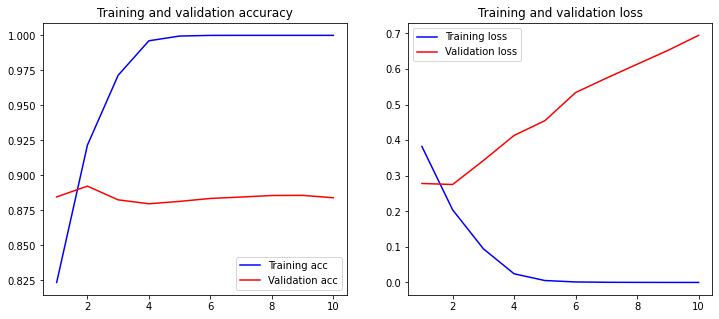

In [ ]:
history   = model_1.fit(X_train, y_train,
                    epochs=10,
                    verbose=True,
                    validation_data=(X_test, y_test),
                    batch_size=50)
loss, accuracy = model_1.evaluate(X_train, y_train, verbose=False)
print("Training Accuracy: {:.4f}".format(accuracy))
# loss, accuracy = model.evaluate(X_test, y_test, verbose=False)
print("Testing Accuracy:  {:.4f}".format(accuracy))
plot_history(history)

In [ ]:
embedding_dim = 50

model = Sequential()
model.add(layers.Embedding(input_dim=vocab_size, 
                           output_dim=embedding_dim, 
                           input_length=maxlen))
model.add(layers.LSTM(50,activation='relu'))

model.add(layers.Dense(1, activation='sigmoid'))
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])
model.summary()


Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, 2500, 50)          5705250   
                                                                 
 lstm (LSTM)                 (None, 50)                20200     
                                                                 
 dense_4 (Dense)             (None, 1)                 51        
                                                                 
Total params: 5,725,501
Trainable params: 5,725,501
Non-trainable params: 0
_________________________________________________________________


In [ ]:
history = model.fit(X_train, y_train,
                    epochs=2,
                    # verbose=True,
                    validation_data=(X_test, y_test))#,
                    # batch_size=50)
loss, accuracy = model.evaluate(X_train, y_train, verbose=False)
print("Training Accuracy: {:.4f}".format(accuracy))
loss, accuracy = model.evaluate(X_test, y_test, verbose=False)
print("Testing Accuracy:  {:.4f}".format(accuracy))
plot_history(history)

Epoch 1/2
 709/1250 [================>.............] - ETA: 12:31 - loss: 0.6933 - accuracy: 0.5017

KeyboardInterrupt: ignored

In [ ]:
embedding_dim = 50

model = Sequential()
model.add(layers.Embedding(input_dim=vocab_size, 
                           output_dim=embedding_dim, 
                           input_length=maxlen,
                           mask_zero=True))
model.add(layers.LSTM(50,activation='relu'))
model.add(layers.Dense(10, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])
model.summary()

history = model.fit(X_train, y_train,
                    epochs=2,
                    # verbose=True,
                    validation_data=(X_test, y_test))#,
                    # batch_size=50)
loss, accuracy = model.evaluate(X_train, y_train, verbose=False)
print("Training Accuracy: {:.4f}".format(accuracy))
loss, accuracy = model.evaluate(X_test, y_test, verbose=False)
print("Testing Accuracy:  {:.4f}".format(accuracy))
plot_history(history)

Model: "sequential_23"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_15 (Embedding)    (None, 2500, 50)          5705250   
                                                                 
 lstm_15 (LSTM)              (None, 50)                20200     
                                                                 
 dense_16 (Dense)            (None, 10)                510       
                                                                 
 dense_17 (Dense)            (None, 1)                 11        
                                                                 
Total params: 5,725,971
Trainable params: 5,725,971
Non-trainable params: 0
_________________________________________________________________
Epoch 1/2
 505/1250 [===========>..................] - ETA: 22:28 - loss: nan - accuracy: 0.5141

KeyboardInterrupt: ignored

In [ ]:
X_train.shape

(40000, 2500)

In [ ]:
embedding_dim = 50
shortenlen = 500

model = Sequential()
model.add(layers.Embedding(input_dim=vocab_size, 
                           output_dim=embedding_dim, 
                           input_length=shortenlen))
model.add(layers.LSTM(50,activation='relu'))

model.add(layers.Dense(1, activation='sigmoid'))
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])
model.summary()

history = model.fit(X_train[:,:shortenlen], y_train,
                    epochs=2,
                    # verbose=True,
                    validation_data=(X_test[:,:shortenlen], y_test))#,
                    # batch_size=50)
loss, accuracy = model.evaluate(X_train, y_train, verbose=False)
print("Training Accuracy: {:.4f}".format(accuracy))
loss, accuracy = model.evaluate(X_test, y_test, verbose=False)
print("Testing Accuracy:  {:.4f}".format(accuracy))
plot_history(history)


Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_6 (Embedding)     (None, 500, 50)           5705250   
                                                                 
 lstm_4 (LSTM)               (None, 50)                20200     
                                                                 
 dense_7 (Dense)             (None, 1)                 51        
                                                                 
Total params: 5,725,501
Trainable params: 5,725,501
Non-trainable params: 0
_________________________________________________________________
Epoch 1/2
 406/1250 [========>.....................] - ETA: 3:51 - loss: nan - accuracy: 0.4997

KeyboardInterrupt: ignored

In [ ]:
X_train[:,:shortenlen].shape

(40000, 500)

In [ ]:
embedding_dim = 50
shortenlen = 500

model = Sequential()
# model.add(layers.Masking(mask_value=0.0, input_shape=(None, 500)))
model.add(layers.Embedding(input_dim=vocab_size, 
                           output_dim=embedding_dim, 
                           input_length=shortenlen,
                           mask_zero=True))
# model.add(layers.Embedding(input_dim = 500, output_dim=embedding_dim))
model.add(layers.LSTM(50,activation='relu'))

model.add(layers.Dense(1, activation='sigmoid'))
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])
model.summary()

history = model.fit(X_train[:,:shortenlen], y_train,
                    epochs=2,
                    # verbose=True,
                    validation_data=(X_test[:,:shortenlen], y_test))#,
                    # batch_size=50)
loss, accuracy = model.evaluate(X_train, y_train, verbose=False)
print("Training Accuracy: {:.4f}".format(accuracy))
loss, accuracy = model.evaluate(X_test, y_test, verbose=False)
print("Testing Accuracy:  {:.4f}".format(accuracy))
plot_history(history)


Model: "sequential_20"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_12 (Embedding)    (None, 500, 50)           5705250   
                                                                 
 lstm_12 (LSTM)              (None, 50)                20200     
                                                                 
 dense_13 (Dense)            (None, 1)                 51        
                                                                 
Total params: 5,725,501
Trainable params: 5,725,501
Non-trainable params: 0
_________________________________________________________________
Epoch 1/2
 588/1250 [=============>................] - ETA: 3:42 - loss: nan - accuracy: 0.5038

KeyboardInterrupt: ignored

In [ ]:
embedding_dim = 50
shortenlen = 500

model = Sequential()
model.add(layers.Embedding(input_dim=vocab_size, 
                           output_dim=embedding_dim, 
                           input_length=shortenlen))
# model.add(layers.Embedding(input_dim = 500, output_dim=embedding_dim))
model.add(layers.Masking(mask_value=0.0, input_shape=(None,embedding_dim)))
model.add(layers.LSTM(50,activation='relu'))

model.add(layers.Dense(1, activation='sigmoid'))
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])
model.summary()

history = model.fit(X_train[:,:shortenlen], y_train,
                    epochs=2,
                    # verbose=True,
                    validation_data=(X_test[:,:shortenlen], y_test))#,
                    # batch_size=50)
loss, accuracy = model.evaluate(X_train, y_train, verbose=False)
print("Training Accuracy: {:.4f}".format(accuracy))
loss, accuracy = model.evaluate(X_test, y_test, verbose=False)
print("Testing Accuracy:  {:.4f}".format(accuracy))
plot_history(history)


Model: "sequential_17"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_10 (Embedding)    (None, 500, 50)           5705250   
                                                                 
 masking_11 (Masking)        (None, 500, 50)           0         
                                                                 
 lstm_9 (LSTM)               (None, 50)                20200     
                                                                 
 dense_10 (Dense)            (None, 1)                 51        
                                                                 
Total params: 5,725,501
Trainable params: 5,725,501
Non-trainable params: 0
_________________________________________________________________
Epoch 1/2
 756/1250 [=================>............] - ETA: 2:51 - loss: nan - accuracy: 0.4980

KeyboardInterrupt: ignored

In [ ]:
embedding_dim = 50
shortenlen = 500

model = Sequential()
model.add(layers.Embedding(input_dim=vocab_size, 
                           output_dim=embedding_dim, 
                           input_length=shortenlen))
model.add(layers.LSTM(50,activation='relu'))

model.add(layers.Dense(1, activation='sigmoid'))
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])
model.summary()

history = model.fit(X_train[:,:shortenlen], y_train,
                    epochs=2,
                    # verbose=True,
                    validation_data=(X_test[:,:shortenlen], y_test))#,
                    # batch_size=50)
loss, accuracy = model.evaluate(X_train, y_train, verbose=False)
print("Training Accuracy: {:.4f}".format(accuracy))
loss, accuracy = model.evaluate(X_test, y_test, verbose=False)
print("Testing Accuracy:  {:.4f}".format(accuracy))
plot_history(history)


In [ ]:
 model.add(LSTM(50, activation='relu', input_shape=(max_len,len_vocab)))
    model.add(Dropout(0.2))
    model.add(Dense(2, activity_regularizer=l2(0.002)))
    model.add(Activation('softmax'))
    model.compile(loss='categorical_crossentropy', optimizer='adam',metrics=['accuracy'])

In [ ]:
model=keras.Sequential([keras.layers.Embedding(10000,16,input_length=2500),
                        keras.layers.GlobalAveragePooling1D(),
                        keras.layers.Dense(16,activation='relu'),
                        keras.layers.Dense(1,activation='sigmoid')])

In [ ]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [ ]:
history=model.fit(X_train,y_train,epochs=30,batch_size=512,validation_data=(X_test,y_test))

Epoch 1/30
79/79 [==============================] - 21s 240ms/step - loss: 0.6928 - accuracy: 0.5346 - val_loss: 0.6923 - val_accuracy: 0.6670
Epoch 2/30
79/79 [==============================] - 21s 262ms/step - loss: 0.6913 - accuracy: 0.5646 - val_loss: 0.6898 - val_accuracy: 0.5826
Epoch 3/30
79/79 [==============================] - 18s 223ms/step - loss: 0.6868 - accuracy: 0.6262 - val_loss: 0.6822 - val_accuracy: 0.7056
Epoch 4/30
79/79 [==============================] - 18s 226ms/step - loss: 0.6730 - accuracy: 0.6961 - val_loss: 0.6611 - val_accuracy: 0.7417
Epoch 5/30
79/79 [==============================] - 18s 223ms/step - loss: 0.6446 - accuracy: 0.7378 - val_loss: 0.6272 - val_accuracy: 0.7639
Epoch 6/30
79/79 [==============================] - 17s 221ms/step - loss: 0.6059 - accuracy: 0.7601 - val_loss: 0.5905 - val_accuracy: 0.7357
Epoch 7/30
79/79 [==============================] - 17s 218ms/step - loss: 0.5652 - accuracy: 0.7756 - val_loss: 0.5488 - val_accuracy: 0.7919

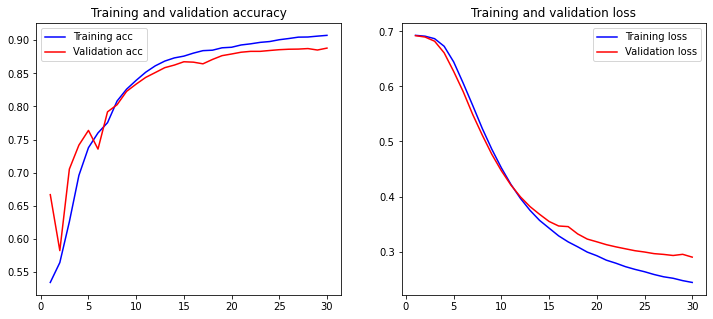

In [ ]:
plot_history(history)

In [ ]:
test = df['review'][1]

In [ ]:
test

'A wonderful little production. The filming technique is very unassuming- very old-time-BBC fashion and gives a comforting, and sometimes discomforting, sense of realism to the entire piece. The actors are extremely well chosen- Michael Sheen not only "has got all the polari" but he has all the voices down pat too! You can truly see the seamless editing guided by the references to Williams\' diary entries, not only is it well worth the watching but it is a terrificly written and performed piece. A masterful production about one of the great master\'s of comedy and his life. The realism really comes home with the little things: the fantasy of the guard which, rather than use the traditional \'dream\' techniques remains solid then disappears. It plays on our knowledge and our senses, particularly with the scenes concerning Orton and Halliwell and the sets (particularly of their flat with Halliwell\'s murals decorating every surface) are terribly well done.'

In [ ]:
test= test.lower()
test = test.split()

In [ ]:

test
    
    

['a',
 'wonderful',
 'little',
 'production.',
 'the',
 'filming',
 'technique',
 'is',
 'very',
 'unassuming-',
 'very',
 'old-time-bbc',
 'fashion',
 'and',
 'gives',
 'a',
 'comforting,',
 'and',
 'sometimes',
 'discomforting,',
 'sense',
 'of',
 'realism',
 'to',
 'the',
 'entire',
 'piece.',
 'the',
 'actors',
 'are',
 'extremely',
 'well',
 'chosen-',
 'michael',
 'sheen',
 'not',
 'only',
 '"has',
 'got',
 'all',
 'the',
 'polari"',
 'but',
 'he',
 'has',
 'all',
 'the',
 'voices',
 'down',
 'pat',
 'too!',
 'you',
 'can',
 'truly',
 'see',
 'the',
 'seamless',
 'editing',
 'guided',
 'by',
 'the',
 'references',
 'to',
 "williams'",
 'diary',
 'entries,',
 'not',
 'only',
 'is',
 'it',
 'well',
 'worth',
 'the',
 'watching',
 'but',
 'it',
 'is',
 'a',
 'terrificly',
 'written',
 'and',
 'performed',
 'piece.',
 'a',
 'masterful',
 'production',
 'about',
 'one',
 'of',
 'the',
 'great',
 "master's",
 'of',
 'comedy',
 'and',
 'his',
 'life.',
 'the',
 'realism',
 'really',
 'c

In [ ]:
df

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive
...,...,...
49995,I thought this movie did a down right good job...,positive
49996,"Bad plot, bad dialogue, bad acting, idiotic di...",negative
49997,I am a Catholic taught in parochial elementary...,negative
49998,I'm going to have to disagree with the previou...,negative


'A wonderful little production. <br /><br />The filming technique is very unassuming- very old-time-BBC fashion and gives a comforting, and sometimes discomforting, sense of realism to the entire piece. <br /><br />The actors are extremely well chosen- Michael Sheen not only "has got all the polari" but he has all the voices down pat too! You can truly see the seamless editing guided by the references to Williams\' diary entries, not only is it well worth the watching but it is a terrificly written and performed piece. A masterful production about one of the great master\'s of comedy and his life. <br /><br />The realism really comes home with the little things: the fantasy of the guard which, rather than use the traditional \'dream\' techniques remains solid then disappears. It plays on our knowledge and our senses, particularly with the scenes concerning Orton and Halliwell and the sets (particularly of their flat with Halliwell\'s murals decorating every surface) are terribly well d

In [ ]:
from bs4 import BeautifulSoup
import requests 

In [ ]:
url = 'https://www.imdb.com/title/tt0468569/reviews/_ajax?ref_=undefined&paginationKey='

In [ ]:
result = requests.get(url)

In [ ]:
doc = BeautifulSoup(result.text,'html.parser')
div_all = doc.find_all('div')
div_all[4]

<div class="lister-item-content">
<a class="title" href="/review/rw5478826/"> The Dark Knight
</a> <div class="display-name-date">
<span class="display-name-link"><a href="/user/ur87850731/">MR-ODIN</a></span><span class="review-date">12 February 2020</span>
</div>
<div class="content">
<div class="text show-more__control">Confidently directed, dark, brooding, and packed with impressive action sequences and a complex story, The Dark Knight includes a career-defining turn from Heath Ledger as well as other Oscar worthy performances, TDK remains not only the best Batman movie, but comic book movie ever created.</div>
<div class="actions text-muted">
                    485 out of 525 found this helpful.
                        <span>
                            Was this review helpful? <a href="/registration/signin"> Sign in</a> to vote.
                        </span>
<br/>
<a href="/review/rw5478826/">Permalink</a>
</div>
</div>
</div>

In [ ]:
import os
 
# Get the list of all files and directories
path = "C:/Users/Neelesh Reddypelli/Documents/3rd Semester/DeepLearning/Projects/2_reviews_per_movie_raw"
dir_list = os.listdir(path)
 
print("Files and directories in '", path, "' :")
 
# prints all files
for i in range(len(dir_list)):
    
    
    dir_list[i] = dir_list[i].replace('.csv','')
    dir_list[i] = dir_list[i][:len(dir_list[i]) - 5]
    
    
print(len(dir_list))


Files and directories in ' C:/Users/Neelesh Reddypelli/Documents/3rd Semester/DeepLearning/Projects/2_reviews_per_movie_raw ' :
1150


In [ ]:
df_1 = pd.read_csv('2_reviews_per_movie_raw/10 Cloverfield Lane 2016.csv')

In [ ]:
i=1
df{i} = 'df'+str(i)+''

In [ ]:
df_1

,username,rating,helpful,total,date,title,review
0,Imme-van-Gorp,7,102,123,30 January 2019,Unfortunately the ending ruined an otherwise ...,This movie is full of suspense. It makes you g...
1,sonofocelot-1,5,385,500,10 May 2016,...oh dear Abrams. Again.\n,I'll leave this review fairly concise. <br/><b...
2,mhodaee,5,110,143,4 August 2017,"Fantastic, gripping, thoroughly enjoyable, un...",I give the 5/10 out of the credit I owe to the...
3,fil-nik09,5,73,100,5 October 2016,Hmmm...\n,"First of all, I must say that I was expecting ..."
4,DVR_Brale,7,42,56,27 July 2016,Slow building & plot alternating claustrophob...,I've always loved movies with strong atmospher...
...,...,...,...,...,...,...,...
747,maurice_yacowar,8,0,2,13 March 2016,Resourceful woman survives villain and monster\n,Just because you're paranoid doesn't mean the ...
748,stevendbeard,7,0,3,11 March 2016,"Related, But Not Really A Sequel\n","I saw ""10 Cloverfield Lane"", starring John Goo..."
749,jmoneyjohal,7,0,3,11 March 2016,A good psychological thriller about the unkno...,"10 Cloverfield Lane,is what I classify as a fi..."
750,MattBirk,8,0,2,11 March 2016,"An amazing mystery thriller, undermined by it...","I'll get this out of the way early, I firmly b..."


In [ ]:
df_1['review'][0]


'This movie is full of suspense. It makes you guess about what is real and what is not. It happens more than once that you have to wonder about what is the truth and who is lying.<br/><br/>Because you are just as clueless as the main character, Michelle, you really get to experience the same type of emotions and confusion as she is. This not only makes you feel closer to Michelle as a character, but also to the overall story.<br/><br/>They did, however, ruin this connection that they build over the course of the story by making this sloppy, rushed and just strange ending. If they had made a different ending, my rating could have been an 8 or maybe even a 9. Depends on how good of an ending it would have been.'

In [ ]:
df

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive
...,...,...
49995,I thought this movie did a down right good job...,positive
49996,"Bad plot, bad dialogue, bad acting, idiotic di...",negative
49997,I am a Catholic taught in parochial elementary...,negative
49998,I'm going to have to disagree with the previou...,negative


In [ ]:
df_1['title'][0]

' Unfortunately the ending ruined an otherwise great film.\n'

In [ ]:
dir_list[1]

'10 Things I Hate About You'

In [ ]:
C:\Users\Neelesh Reddypelli\Documents\3rd Semester\DeepLearning\Projects\1_movies_per_genre

SyntaxError: unexpected character after line continuation character (<ipython-input-62-89f049b0dbcd>, line 1)

In [ ]:
action = pd.read_csv('movies_reviews\Action.csv') 

In [ ]:
action

,name,year,movie_rated,run_length,genres,release_date,rating,num_raters,num_reviews,review_url
0,The Dark Knight,2008,PG-13,2h 32min,Action; Crime; Drama;,18 July 2008 (USA),9.0,2224522,6836,https://www.imdb.com/title/tt0468569/reviews/_...
1,Inception,2010,PG-13,2h 28min,Action; Adventure; Sci-Fi;,16 July 2010 (USA),8.8,1981675,3820,https://www.imdb.com/title/tt1375666/reviews/_...
2,The Matrix,1999,R,2h 16min,Action; Sci-Fi;,31 March 1999 (USA),8.7,1619761,4281,https://www.imdb.com/title/tt0133093/reviews/_...
3,The Lord of the Rings: The Fellowship of the Ring,2001,PG-13,2h 58min,Action; Adventure; Drama;,19 December 2001 (USA),8.8,1609165,5365,https://www.imdb.com/title/tt0120737/reviews/_...
4,The Dark Knight Rises,2012,PG-13,2h 44min,Action; Adventure;,20 July 2012 (USA),8.4,1470329,2979,https://www.imdb.com/title/tt1345836/reviews/_...
...,...,...,...,...,...,...,...,...,...,...
95,Harry Potter and the Order of the Phoenix,2007,PG-13,2h 18min,Action; Adventure;,11 July 2007 (USA),7.5,489759,1189,https://www.imdb.com/title/tt0373889/reviews/_...
96,Spider-Man: Homecoming,2017,PG-13,2h 13min,Action; Adventure; Sci-Fi;,7 July 2017 (USA),7.4,488794,1356,https://www.imdb.com/title/tt2250912/reviews/_...
97,Rise of the Planet of the Apes,2011,PG-13,1h 45min,Action; Drama; Sci-Fi;,5 August 2011 (USA),7.6,488748,706,https://www.imdb.com/title/tt1318514/reviews/_...
98,"I, Robot",2004,PG-13,1h 55min,Action; Drama; Sci-Fi;,16 July 2004 (USA),7.1,488324,839,https://www.imdb.com/title/tt0343818/reviews/_...


In [ ]:
action = list(action['name']) 
for i in range(len(action)):
    action[i] = action[i].replace(':','_')

In [ ]:
len(action)

100

In [ ]:
[i for i in action if i in dir_list]

['The Dark Knight',
 'Inception',
 'The Matrix',
 'The Lord of the Rings_ The Fellowship of the Ring',
 'The Dark Knight Rises',
 'Gladiator',
 'Batman Begins',
 'The Avengers',
 'Star Wars_ Episode IV - A New Hope',
 'Star Wars_ Episode V - The Empire Strikes Back',
 'Avatar',
 'Guardians of the Galaxy',
 'V for Vendetta',
 'Léon_ The Professional',
 'Pirates of the Caribbean_ The Curse of the Black Pearl',
 'Kill Bill_ Vol. 1',
 'Terminator 2_ Judgment Day',
 'Star Wars_ Episode VI - Return of the Jedi',
 'Iron Man',
 'Deadpool',
 'Raiders of the Lost Ark',
 'Mad Max_ Fury Road',
 'Star Wars_ Episode VII - The Force Awakens',
 'Jurassic Park',
 'The Hunger Games',
 'Avengers_ Infinity War',
 'The Terminator',
 'Die Hard',
 'Avengers_ Endgame',
 'Iron Man 3',
 'Thor',
 '300',
 'Captain America_ The First Avenger',
 'Avengers_ Age of Ultron',
 'Captain America_ The Winter Soldier',
 'Star Wars_ Episode I - The Phantom Menace',
 'Iron Man 2',
 'Star Wars_ Episode III - Revenge of the Si

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/imdb.csv')

def preporcessing(df):
    for i in range(len(df)):
        df['review'].iloc[i] = df['review'].iloc[i].replace('<br />','')
        df['review'].iloc[i] = df['review'].iloc[i].lower()
    return df
        
df = preporcessing(df)

df['review'].fillna('').apply(lambda x:len(x.split())).max()

X = df['review']
y = df['sentiment']

X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2, shuffle=True)

X_train.fillna('').apply(lambda x:len(x.split())).max()
X_test.fillna('').apply(lambda x:len(x.split())).max()

X_train = X_train.values
X_test = X_test.values

y_train = y_train.apply(lambda x:1 if x=='positive' else 0)
y_test = y_test.apply(lambda x:1 if x=='positive' else 0)

tokenizer = Tokenizer(num_words=5000)
tokenizer.fit_on_texts(X_train)


X_train_token = tokenizer.texts_to_sequences(X_train)
X_test_token = tokenizer.texts_to_sequences(X_test)

vocab_size = len(tokenizer.word_index) + 1

In [ ]:
maxlen = 2500
X_train = pad_sequences(X_train_token, padding='pre', maxlen=maxlen)
X_test = pad_sequences(X_test_token, padding='pre', maxlen=maxlen)

In [ ]:
embedding_dim = 50

model = Sequential()
model.add(layers.Embedding(input_dim=vocab_size, 
                           output_dim=embedding_dim, 
                           input_length=maxlen))
model.add(layers.LSTM(50,activation='relu'))
model.add(layers.Dense(10, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])
model.summary()

history = model.fit(X_train, y_train,
                    epochs=2,
                    # verbose=True,
                    validation_data=(X_test, y_test))#,
                    # batch_size=50)
loss, accuracy = model.evaluate(X_train, y_train, verbose=False)
print("Training Accuracy: {:.4f}".format(accuracy))
loss, accuracy = model.evaluate(X_test, y_test, verbose=False)
print("Testing Accuracy:  {:.4f}".format(accuracy))
plot_history(history)

Model: "sequential_24"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_16 (Embedding)    (None, 2500, 50)          5722800   
                                                                 
 lstm_16 (LSTM)              (None, 50)                20200     
                                                                 
 dense_18 (Dense)            (None, 10)                510       
                                                                 
 dense_19 (Dense)            (None, 1)                 11        
                                                                 
Total params: 5,743,521
Trainable params: 5,743,521
Non-trainable params: 0
_________________________________________________________________
Epoch 1/2
 223/1250 [====>.........................] - ETA: 25:31 - loss: nan - accuracy: 0.4945

KeyboardInterrupt: ignored

Model: "sequential_25"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_17 (Embedding)    (None, 100, 50)           5722800   
                                                                 
 lstm_17 (LSTM)              (None, 50)                20200     
                                                                 
 dense_20 (Dense)            (None, 10)                510       
                                                                 
 dense_21 (Dense)            (None, 1)                 11        
                                                                 
Total params: 5,743,521
Trainable params: 5,743,521
Non-trainable params: 0
_________________________________________________________________
Epoch 1/2
1250/1250 [==============================] - 189s 149ms/step - loss: 12330113.0000 - accuracy: 0.7372 - val_loss: 502137126912.0000 - val_accuracy: 0.6608
Epoch 2/2


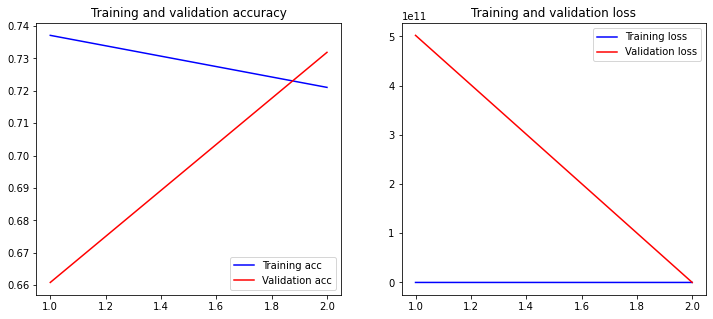

In [ ]:
maxlen = 100
X_train = pad_sequences(X_train_token, padding='pre', maxlen=maxlen)
X_test = pad_sequences(X_test_token, padding='pre', maxlen=maxlen)

embedding_dim = 50

model = Sequential()
model.add(layers.Embedding(input_dim=vocab_size, 
                           output_dim=embedding_dim, 
                           input_length=maxlen))
model.add(layers.LSTM(50,activation='relu'))
model.add(layers.Dense(10, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])
model.summary()

history = model.fit(X_train, y_train,
                    epochs=2,
                    # verbose=True,
                    validation_data=(X_test, y_test))#,
                    # batch_size=50)
loss, accuracy = model.evaluate(X_train, y_train, verbose=False)
print("Training Accuracy: {:.4f}".format(accuracy))
loss, accuracy = model.evaluate(X_test, y_test, verbose=False)
print("Testing Accuracy:  {:.4f}".format(accuracy))
plot_history(history)

Model: "sequential_26"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_18 (Embedding)    (None, 100, 50)           5722800   
                                                                 
 lstm_18 (LSTM)              (None, 50)                20200     
                                                                 
 dense_22 (Dense)            (None, 10)                510       
                                                                 
 dense_23 (Dense)            (None, 1)                 11        
                                                                 
Total params: 5,743,521
Trainable params: 5,743,521
Non-trainable params: 0
_________________________________________________________________
Epoch 1/5
1250/1250 [==============================] - 140s 111ms/step - loss: 58458.2266 - accuracy: 0.6982 - val_loss: 0.5711 - val_accuracy: 0.7275
Epoch 2/5
1250/1250 [===

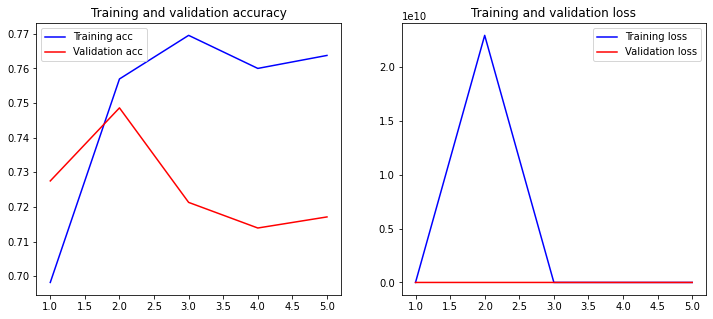

In [ ]:
maxlen = 100
X_train = pad_sequences(X_train_token, padding='pre', maxlen=maxlen)
X_test = pad_sequences(X_test_token, padding='pre', maxlen=maxlen)

embedding_dim = 50

model = Sequential()
model.add(layers.Embedding(input_dim=vocab_size, 
                           output_dim=embedding_dim, 
                           input_length=maxlen))
model.add(layers.LSTM(50,activation='relu'))
model.add(layers.Dense(10, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])
model.summary()

history = model.fit(X_train, y_train,
                    epochs=5,
                    # verbose=True,
                    validation_data=(X_test, y_test))#,
                    # batch_size=50)
loss, accuracy = model.evaluate(X_train, y_train, verbose=False)
print("Training Accuracy: {:.4f}".format(accuracy))
loss, accuracy = model.evaluate(X_test, y_test, verbose=False)
print("Testing Accuracy:  {:.4f}".format(accuracy))
plot_history(history)

Model: "sequential_27"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_19 (Embedding)    (None, 100, 50)           5722800   
                                                                 
 simple_rnn (SimpleRNN)      (None, 50)                5050      
                                                                 
 dense_24 (Dense)            (None, 10)                510       
                                                                 
 dense_25 (Dense)            (None, 1)                 11        
                                                                 
Total params: 5,728,371
Trainable params: 5,728,371
Non-trainable params: 0
_________________________________________________________________
Epoch 1/5
1250/1250 [==============================] - 112s 87ms/step - loss: 0.4446 - accuracy: 0.7843 - val_loss: 0.3582 - val_accuracy: 0.8485
Epoch 2/5
1250/1250 [========

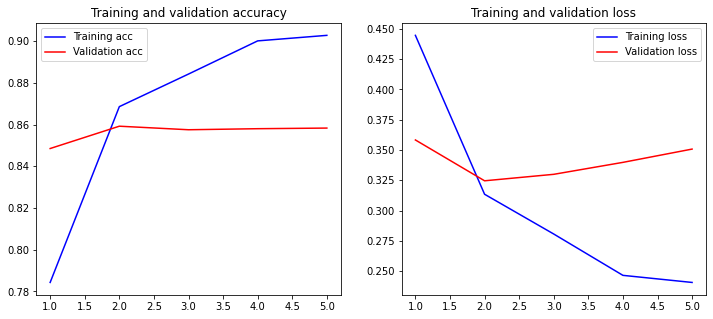

In [ ]:
maxlen = 100
X_train = pad_sequences(X_train_token, padding='pre', maxlen=maxlen)
X_test = pad_sequences(X_test_token, padding='pre', maxlen=maxlen)

embedding_dim = 50

model = Sequential()
model.add(layers.Embedding(input_dim=vocab_size, 
                           output_dim=embedding_dim, 
                           input_length=maxlen))
model.add(layers.SimpleRNN(50,activation='relu'))
model.add(layers.Dense(10, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])
model.summary()

history = model.fit(X_train, y_train,
                    epochs=5,
                    # verbose=True,
                    validation_data=(X_test, y_test))#,
                    # batch_size=50)
loss, accuracy = model.evaluate(X_train, y_train, verbose=False)
print("Training Accuracy: {:.4f}".format(accuracy))
loss, accuracy = model.evaluate(X_test, y_test, verbose=False)
print("Testing Accuracy:  {:.4f}".format(accuracy))
plot_history(history)

Model: "sequential_28"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_20 (Embedding)    (None, 100, 50)           5722800   
                                                                 
 gru (GRU)                   (None, 50)                15300     
                                                                 
 dense_26 (Dense)            (None, 10)                510       
                                                                 
 dense_27 (Dense)            (None, 1)                 11        
                                                                 
Total params: 5,738,621
Trainable params: 5,738,621
Non-trainable params: 0
_________________________________________________________________
Epoch 1/5
1250/1250 [==============================] - 136s 107ms/step - loss: 0.4846 - accuracy: 0.7717 - val_loss: 0.3368 - val_accuracy: 0.8568
Epoch 2/5
1250/1250 [=======

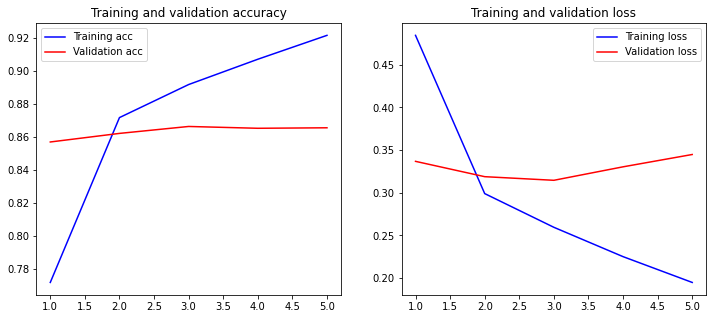

In [ ]:
maxlen = 100
X_train = pad_sequences(X_train_token, padding='pre', maxlen=maxlen)
X_test = pad_sequences(X_test_token, padding='pre', maxlen=maxlen)

embedding_dim = 50

model = Sequential()
model.add(layers.Embedding(input_dim=vocab_size, 
                           output_dim=embedding_dim, 
                           input_length=maxlen))
model.add(layers.GRU(50,activation='relu'))
model.add(layers.Dense(10, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])
model.summary()

history = model.fit(X_train, y_train,
                    epochs=5,
                    # verbose=True,
                    validation_data=(X_test, y_test))#,
                    # batch_size=50)
loss, accuracy = model.evaluate(X_train, y_train, verbose=False)
print("Training Accuracy: {:.4f}".format(accuracy))
loss, accuracy = model.evaluate(X_test, y_test, verbose=False)
print("Testing Accuracy:  {:.4f}".format(accuracy))
plot_history(history)